**$\underline{Poisson\hspace{0.2cm} Distribution\hspace{0.2cm} Applied\hspace{0.2cm} in\hspace{0.2cm} Radioactive\hspace{0.2cm} Decay}$**

Using random numbers to create probability of nuclear disintegration.

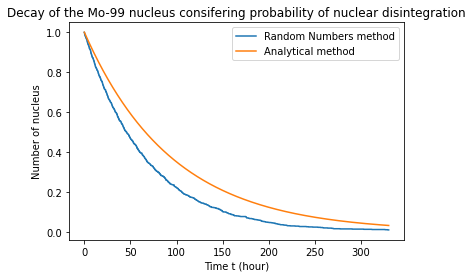

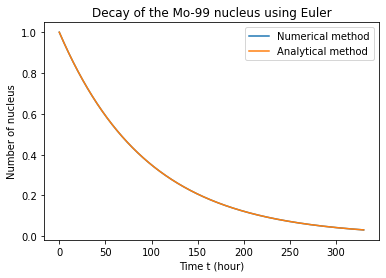

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Initial Conditions:
T1,T2 = 66,6 # tau, half life time.
dt = 0.005 # Distance of the steps that will be calculated.
n1n = 1 # Numerical n1, with its unit value.
n1a,n10,lam1 = n1n,n1n,np.log(2)/T1 # Analytical n1, initial n1, lambda of n1 (rate of decay) = lam = ln(2)/t = 0,0105...
n2n,n2a,lam2 = 0,0,np.log(2)/T2 # Numerical n2, analytical n2, lambda n2 = 0,1155...
t = 0 # Initial time of the loop.
tf = 5 * T1 # Final time of the loop.

# Lists:
list_n1n = [n1n] 
list_n1a = [n1a] 
list_n2n = [n2n] 
list_n2a = [n2a] 
list_t = [t] 

'''     Using random numbers in Decay         '''
a,b,c = 1029,221591,1048576
seed = 3072

def rand():
  global seed
  seed = (a * seed + b)%c
  return float(seed/c)

dt = 0.01
lam = 5

# The for() count 1 by 1, and not dt by dt, to fix this, we separate the tf by a length of dt:
NP = int(tf/dt) 
p = lam/NP # Is the probability.

Ni = 1000
Nt = Ni
list_Y = []
list_X = []

for i in range(NP):
  
  count = 0
   # The probability is always the same.
  
  for j in range(1,Nt + 1): # because x does not start from 0, but from 1, so we have to go from 1 to n + 1.
    y = rand()
    if(y < p): # Check if the random number is less than the probability.
      count += 1

  Nt -= count
  list_X.append(i * dt) # Doing the same thing as NP, but with this list.
  list_Y.append(float(Nt/Ni)) # This will normalize the number of nucleus, because one is n1n and the other is 1000, 
  # this is to make the two equal.


'''   Using Euler in Decay          '''
while t < tf: # loop that will calculate the points from 0 to 5 * t1(= 330). 

  # For Mo-99:
  n1a = n10 * np.exp(-lam1 * t) # Analytical solution of N1(t).
  list_n1a.append(n1a)
  
  n1n = n1n * (1 - lam1 * dt) # Numerical solution of N1(t) with Explicit Euler's method.
  list_n1n.append(n1n)

  t = t + dt # Number of "steps" that increases according to the width of dt.
  list_t.append(t)


#  Graphs:

# 1) Graph of Random method to create the probability of nuclear disintegration:
plt.plot(list_X,list_Y)
plt.plot(list_t,list_n1a)
plt.title('Decay of the Mo-99 nucleus considering probability of nuclear disintegration')
plt.legend(['Random Numbers method','Analytical method']) 
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus')
plt.show()


# 2) Graph of Euler method:
plt.plot(list_t,list_n1n) 
plt.plot(list_t,list_n1a)
plt.title('Decay of the Mo-99 nucleus using Euler')
plt.legend(['Numerical method','Analytical method']) 
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus')
plt.show()